# World Happiness Report - 2023

The World Happiness Report is a report put by Gallup, the Oxford Wellbeing Research Centre, the UN Sustainable Development Solutions Network and WHR's Editorial Board. By its own criterias and using the science of happiness, it basically shows countries' state of happiness. Life evaluations from the Gallup World Poll provide the basis for the annual happiness rankings. They are based on answers to the main life evaluation question. The Cantril Ladder asks respondents to think of a ladder, with the best possible life for them being a 10 and the worst possible life being a 0. They are then asked to rate their own current lives on that 0 to 10 scale. The rankings are from nationally representative samples over three years.

Source: https://worldhappiness.report

World Happiness Report 2023 Dataset: https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2023  
Country Mapping Dataset: https://www.kaggle.com/datasets/andradaolteanu/country-mapping-iso-continent-region

In this notebook, only the ladder score and the ranks of the countries will be used. Other factors are going to be added to measurement later.

## Table of Contents
1. [First Step: Preparing Dataframes](#importing-libraries-and-reading-csv-file)
    1. [Information](#information-about-the-dataframes)
    2. [Dropping Columns](#dropping-unused-columns-from-both-dataframes)
    3. [Renaming Columns](#renaming-existing-columns)
    4. [Creating A New Column](#creating-a-new-column)

2. [Second Step: Merging Dataframes](#merging-two-dataframes)
    1. [Finding Null Values](#finding-columns-with-null-values)
    
3. [Third Step: Plotting](#plotting)
    1. [Happy - Unhappy](#happy---unhappy)
    2. [Top 10 and Bottom 10](#top-10---bottom-10-plot)
    3. [Happiness by Region](#happiness-by-region)
    4. [Happiness Rank on the Maps](#happiness-rank-on-the-maps)

---

## Importing Libraries and Reading CSV File

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [65]:
# Creating two dataframes from two CSV files
df = pd.read_csv("WHR2023.csv")
country_map = pd.read_csv("continents2.csv")

# This is a personal choice, doesn't affect anything
plt.style.use("fivethirtyeight")

### Information about the dataframes

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                137 non-null    object 
 1   Ladder score                                137 non-null    float64
 2   Standard error of ladder score              137 non-null    float64
 3   upperwhisker                                137 non-null    float64
 4   lowerwhisker                                137 non-null    float64
 5   Logged GDP per capita                       137 non-null    float64
 6   Social support                              137 non-null    float64
 7   Healthy life expectancy                     136 non-null    float64
 8   Freedom to make life choices                137 non-null    float64
 9   Generosity                                  137 non-null    float64
 10  Perceptions of

In [67]:
country_map.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      249 non-null    object 
 1   alpha-2                   248 non-null    object 
 2   alpha-3                   249 non-null    object 
 3   country-code              249 non-null    int64  
 4   iso_3166-2                249 non-null    object 
 5   region                    248 non-null    object 
 6   sub-region                248 non-null    object 
 7   intermediate-region       107 non-null    object 
 8   region-code               248 non-null    float64
 9   sub-region-code           248 non-null    float64
 10  intermediate-region-code  107 non-null    float64
dtypes: float64(3), int64(1), object(7)
memory usage: 21.5+ KB


### Dropping unused columns from both dataframes

In [68]:
# These columns are not going to be used. The first colon selects all, then the columns within the range will be dropped
df.drop(df.loc[:, "Ladder score in Dystopia": "Dystopia + residual"], axis=1, inplace=True)
df.drop(df.loc[:, "Standard error of ladder score": "lowerwhisker"], axis=1, inplace=True)

In [69]:
country_map.drop(["alpha-2", "country-code", "iso_3166-2"], axis=1, inplace=True)
country_map.drop(country_map.loc[:, "intermediate-region": "intermediate-region-code"], axis=1, inplace=True)

In [70]:
df.head()

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182
1,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196
2,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668
3,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708
4,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379


In [71]:
country_map.head()

,name,alpha-3,region,sub-region
0,Afghanistan,AFG,Asia,Southern Asia
1,Åland Islands,ALA,Europe,Northern Europe
2,Albania,ALB,Europe,Southern Europe
3,Algeria,DZA,Africa,Northern Africa
4,American Samoa,ASM,Oceania,Polynesia


### Renaming existing columns

In [72]:
# For better readability, column names are changed
df.rename({
    "Country name": "country_name",
    "Ladder score": "ladder_score",
    "Logged GDP per capita": "log_gdp_per_capita",
    "Social support": "social_support",
    "Healthy life expectancy": "healthy_life_expectancy",
    "Freedom to make life choises": "freedom",
    "Generosity": "generosity",
    "Perceptions of corruption": "perceptions_of_corruptance"
}, axis=1, inplace=True)

In [73]:
# country_name is the same because two dataframes are going to be merged by this column
country_map.rename({
    "name": "country_name",
    "alpha-3": "iso_alpha",
    "sub-region": "sub_region"
}, axis=1, inplace=True)

### Creating a New Column

In [74]:
# Creating integer "rank" column
df["rank"] = df["ladder_score"].rank(ascending=False).astype("int")

In [75]:
# Changing the "rank" column's index
df.insert(2, "rank", df.pop("rank"))

In [76]:
df.head()

,country_name,ladder_score,rank,log_gdp_per_capita,social_support,healthy_life_expectancy,Freedom to make life choices,generosity,perceptions_of_corruptance
0,Finland,7.804,1,10.792,0.969,71.150,0.961,-0.019,0.182
1,Denmark,7.586,2,10.962,0.954,71.250,0.934,0.134,0.196
2,Iceland,7.530,3,10.896,0.983,72.050,0.936,0.211,0.668
3,Israel,7.473,4,10.639,0.943,72.697,0.809,-0.023,0.708
4,Netherlands,7.403,5,10.942,0.930,71.550,0.887,0.213,0.379


---

## Merging Two Dataframes

In [77]:
# Two dataframes are merged because one of their columns is the same - country_name
merged_df = df.merge(country_map, on="country_name", how="left")
merged_df

,country_name,ladder_score,rank,log_gdp_per_capita,social_support,healthy_life_expectancy,Freedom to make life choices,generosity,perceptions_of_corruptance,iso_alpha,region,sub_region
0,Finland,7.804,1,10.792,0.969,71.150,0.961,-0.019,0.182,FIN,Europe,Northern Europe
1,Denmark,7.586,2,10.962,0.954,71.250,0.934,0.134,0.196,DNK,Europe,Northern Europe
2,Iceland,7.530,3,10.896,0.983,72.050,0.936,0.211,0.668,ISL,Europe,Northern Europe
3,Israel,7.473,4,10.639,0.943,72.697,0.809,-0.023,0.708,ISR,Asia,Western Asia
4,Netherlands,7.403,5,10.942,0.930,71.550,0.887,0.213,0.379,NLD,Europe,Western Europe
...,...,...,...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),3.207,133,7.007,0.652,55.375,0.664,0.086,0.834,NaN,NaN,NaN
133,Zimbabwe,3.204,134,7.641,0.690,54.050,0.654,-0.046,0.766,ZWE,Africa,Sub-Saharan Africa
134,Sierra Leone,3.138,135,7.394,0.555,54.900,0.660,0.105,0.858,SLE,Africa,Sub-Saharan Africa
135,Lebanon,2.392,136,9.478,0.530,66.149,0.474,-0.141,0.891,LBN,Asia,Western Asia


### Finding Columns with NULL Values

In [78]:
# During the merge, some countries didn't merge correctly due to name differences between two dataframes.
nan_region = merged_df[merged_df["region"].isnull()]
nan_region

,country_name,ladder_score,rank,log_gdp_per_capita,social_support,healthy_life_expectancy,Freedom to make life choices,generosity,perceptions_of_corruptance,iso_alpha,region,sub_region
17,Czechia,6.845,18,10.611,0.953,69.050,0.903,0.040,0.859,NaN,NaN,NaN
26,Taiwan Province of China,6.535,27,10.797,0.884,69.600,0.804,-0.129,0.681,NaN,NaN,NaN
33,Kosovo,6.368,34,9.359,0.844,65.195,0.861,0.259,0.866,NaN,NaN,NaN
70,Bosnia and Herzegovina,5.633,71,9.616,0.880,67.275,0.746,0.206,0.918,NaN,NaN,NaN
81,Hong Kong S.A.R. of China,5.308,82,10.966,0.817,77.280,0.687,-0.026,0.385,NaN,NaN,NaN
85,Congo (Brazzaville),5.267,86,8.095,0.605,56.850,0.730,-0.004,0.739,NaN,NaN,NaN
86,North Macedonia,5.254,87,9.703,0.805,66.500,0.769,0.131,0.902,NaN,NaN,NaN
92,Ivory Coast,5.053,93,8.576,0.572,55.953,0.733,0.003,0.746,NaN,NaN,NaN
98,State of Palestine,4.908,99,8.716,0.859,NaN,0.694,-0.132,0.836,NaN,NaN,NaN
105,Turkiye,4.614,106,10.307,0.796,68.663,0.475,-0.077,0.795,NaN,NaN,NaN


In [79]:
# Changing the name of the countries so two dataframes would match
country_map["country_name"] = country_map["country_name"].str.replace("Czech Republic", "Czechia", regex=True).replace("Taiwan", "Taiwan Province of China", regex=True).replace("Hong Kong", "Hong Kong S.A.R. of China", regex=True).replace("Macedonia", "North Macedonia", regex=True).replace("Côte D'Ivoire", "Ivory Coast", regex=True).replace("Palestine, State of", "State of Palestine", regex=True).replace("Turkey", "Turkiye", regex=True)

In [80]:
# Checking if changes are correct
country_map.loc[227]

country_name         Turkiye
iso_alpha                TUR
region                  Asia
sub_region      Western Asia
Name: 227, dtype: object

In [81]:
# Merging the dataframes again
merged_df = df.merge(country_map, on="country_name", how="left")
merged_df

,country_name,ladder_score,rank,log_gdp_per_capita,social_support,healthy_life_expectancy,Freedom to make life choices,generosity,perceptions_of_corruptance,iso_alpha,region,sub_region
0,Finland,7.804,1,10.792,0.969,71.150,0.961,-0.019,0.182,FIN,Europe,Northern Europe
1,Denmark,7.586,2,10.962,0.954,71.250,0.934,0.134,0.196,DNK,Europe,Northern Europe
2,Iceland,7.530,3,10.896,0.983,72.050,0.936,0.211,0.668,ISL,Europe,Northern Europe
3,Israel,7.473,4,10.639,0.943,72.697,0.809,-0.023,0.708,ISR,Asia,Western Asia
4,Netherlands,7.403,5,10.942,0.930,71.550,0.887,0.213,0.379,NLD,Europe,Western Europe
...,...,...,...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),3.207,133,7.007,0.652,55.375,0.664,0.086,0.834,NaN,NaN,NaN
133,Zimbabwe,3.204,134,7.641,0.690,54.050,0.654,-0.046,0.766,ZWE,Africa,Sub-Saharan Africa
134,Sierra Leone,3.138,135,7.394,0.555,54.900,0.660,0.105,0.858,SLE,Africa,Sub-Saharan Africa
135,Lebanon,2.392,136,9.478,0.530,66.149,0.474,-0.141,0.891,LBN,Asia,Western Asia


In [82]:
nan_region = merged_df[merged_df["region"].isnull()]
nan_region

,country_name,ladder_score,rank,log_gdp_per_capita,social_support,healthy_life_expectancy,Freedom to make life choices,generosity,perceptions_of_corruptance,iso_alpha,region,sub_region
33,Kosovo,6.368,34,9.359,0.844,65.195,0.861,0.259,0.866,NaN,NaN,NaN
70,Bosnia and Herzegovina,5.633,71,9.616,0.880,67.275,0.746,0.206,0.918,NaN,NaN,NaN
85,Congo (Brazzaville),5.267,86,8.095,0.605,56.850,0.730,-0.004,0.739,NaN,NaN,NaN
132,Congo (Kinshasa),3.207,133,7.007,0.652,55.375,0.664,0.086,0.834,NaN,NaN,NaN


In [83]:
# Filling null values by hand because the problem isn't because of name difference
merged_df.loc[33, ["region", "sub_region", "iso_alpha"]] = ["Europe", "Southern Europe", "XXK"]
merged_df.loc[70, ["region", "sub_region", "iso_alpha"]] = ["Europe", "Southern Europe", "BIH"]
merged_df.loc[85, ["region", "sub_region", "iso_alpha"]] = ["Africa", "Sub-Saharan Africa", "COG"]
merged_df.loc[132, ["region", "sub_region", "iso_alpha"]] = ["Africa", "Sub-Saharan Africa", "COD"]

In [84]:
# This function checks every country's ladder score and whether the score is higher or lower than the mean of ladder score
ladder_mean = merged_df["ladder_score"].mean()
def happiness_index(score):
    if score < ladder_mean:
        return "Unhappy"
    else:
        return "Happy"
    
merged_df["above_or_below"] = merged_df["ladder_score"].map(happiness_index)

---

## Plotting

### Happy - Unhappy

Text(Unhappy, 63, '63')

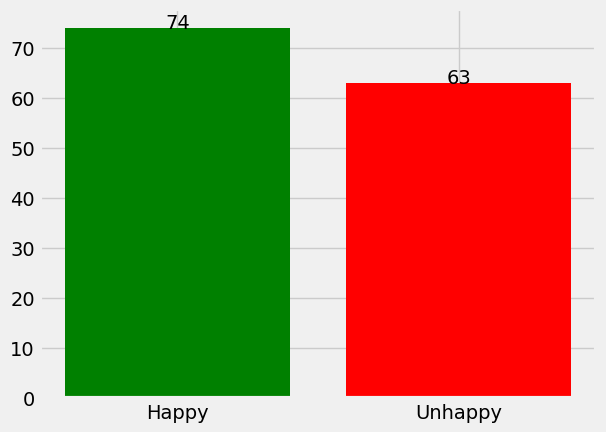

In [85]:
# Counting how many happy/unhappy countries there are
happy = merged_df["above_or_below"].value_counts()["Happy"]
unhappy = merged_df["above_or_below"].value_counts()["Unhappy"]

# Creating a barplot
plt.bar(["Happy", "Unhappy"], [happy, unhappy], color=["green", "red"])
plt.text("Happy", happy, happy, ha="center")
plt.text("Unhappy", unhappy, unhappy, ha="center")

### Top 10 - Bottom 10 Plot

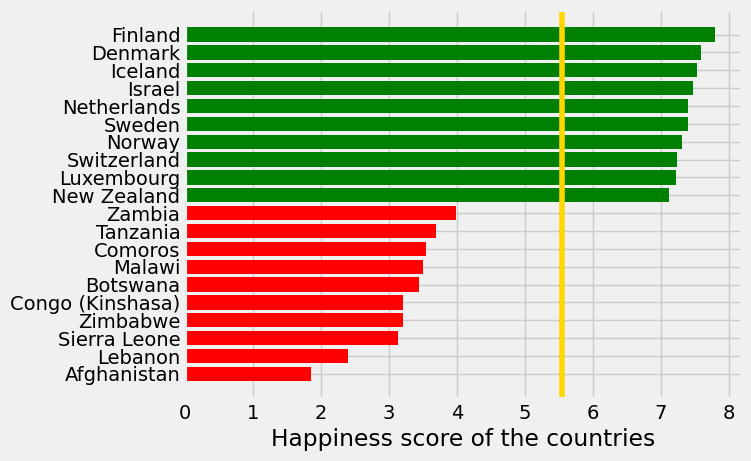

In [86]:
top10 = merged_df.head(10).sort_values(by="ladder_score")
last10 = merged_df.tail(10).sort_values(by="ladder_score")
best_worst = pd.concat([top10, last10], axis=0)
best_worst = best_worst.sort_values(by="ladder_score")

plt.barh(last10["country_name"], last10["ladder_score"], color="red")
plt.barh(top10["country_name"], top10["ladder_score"], color="green")
plt.xlabel("Happiness score of the countries")
plt.axvline(merged_df["ladder_score"].mean(), color="gold") # shows the mean of ladder_score

### Happiness by Region

In [87]:
# Grouping main regions by the ladder score
happiness_by_region = merged_df.groupby("region")[["ladder_score"]].mean().sort_index(ascending=False).reset_index()
happiness_by_region

,region,ladder_score
0,Oceania,7.109000
1,Europe,6.476462
2,Asia,5.300553
3,Americas,6.057619
4,Africa,4.419486


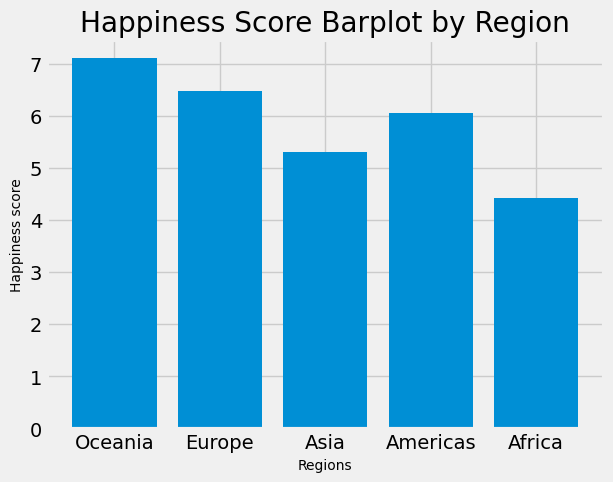

In [88]:
plt.bar(happiness_by_region["region"], happiness_by_region["ladder_score"])
plt.title("Happiness Score Barplot by Region")
plt.ylabel("Happiness score", fontsize=10)
plt.xlabel("Regions", fontsize=10)
plt.show()

### Happiness Rank on the Maps

In [89]:
# Creating a World map using plotly library and visualising ladder score ranking on the map
world_map = px.choropleth(merged_df, locations="iso_alpha", color="rank", scope="world", title="Happiness Ranking on the World Map", color_continuous_scale="rdylgn_r", hover_name="country_name")
world_map.show()

In [90]:
# Just the map of Europe
europe = px.choropleth(merged_df, locations="iso_alpha", color="rank", scope="europe", title="Happiness Ranking of Europe", color_continuous_scale="rdylgn_r", hover_name="country_name")
europe.show()

In [91]:
# Just the map of Asia
asia = px.choropleth(merged_df, locations="iso_alpha", color="rank", scope="asia", title="Happiness Ranking of Asia", color_continuous_scale="rdylgn_r", hover_name="country_name")
asia.show()

In [92]:
# Just the map of Africa
africa = px.choropleth(merged_df, locations="iso_alpha", color="rank", scope="africa", title="Happiness Ranking of Africa", color_continuous_scale="rdylgn_r", hover_name="country_name")
africa.show()